## Student_Name: Nilufer Metin
### Student _ID: 873094058

### Instructor: Pooran Negi

### Class: Data Science Tools-2

In [138]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm

In [139]:
#!pip install missingno

In [140]:
data = pd.read_csv("2-ThreeCars2017.csv")

In [141]:
data.head()

,Unnamed: 0,CarType,Age,Price,Mileage,Mazda6,Accord,Maxima
0,1,Mazda6,3,15.9,17.8,1,0,0
1,2,Mazda6,2,16.4,19.0,1,0,0
2,3,Mazda6,1,18.9,20.9,1,0,0
3,4,Mazda6,2,16.9,24.0,1,0,0
4,5,Mazda6,2,20.5,24.0,1,0,0


In [142]:
#Drpping the first column where I had indexing. But Pandas also creates indexes so it isn't necessary.
data=data.drop(data.columns[0],axis=1)

In [143]:
data.head()

,CarType,Age,Price,Mileage,Mazda6,Accord,Maxima
0,Mazda6,3,15.9,17.8,1,0,0
1,Mazda6,2,16.4,19.0,1,0,0
2,Mazda6,1,18.9,20.9,1,0,0
3,Mazda6,2,16.9,24.0,1,0,0
4,Mazda6,2,20.5,24.0,1,0,0


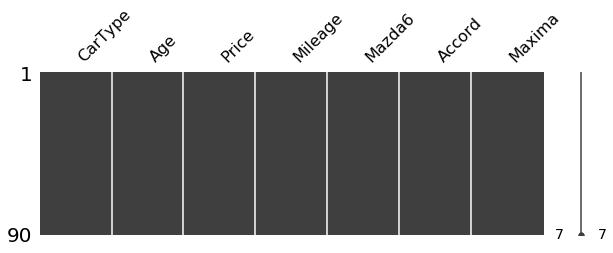

In [144]:
#Checking if there is any missing values. Below shows that there isn't. 
#If there was we would see some white strips along the attributes
msno.matrix(data,figsize=(10,3))

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Price Distribution based on the age of the Car')]

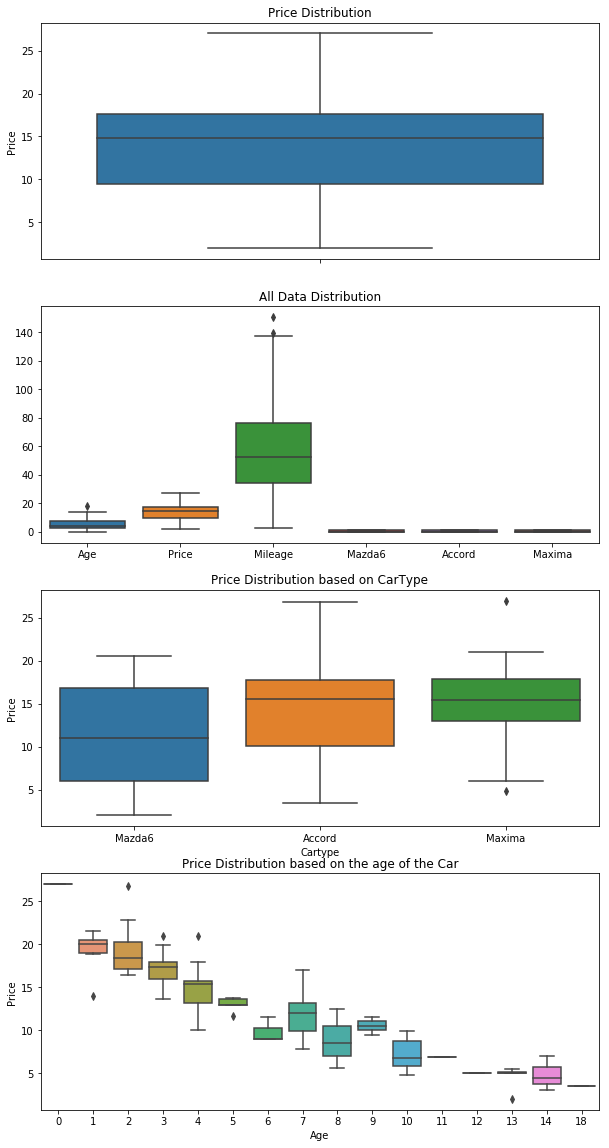

In [145]:
#Plotting and visualizeing the data to see what the distrubitions are and how the data integrate which each other.

#Looks like Price attribute is well distributed. Data doesn't really have critical outliers.

#But data needs to be scaled because each attribute is on different scale.

fig, axes = plt.subplots(nrows =4, ncols= 1)
fig.set_size_inches(10,20)
sn.boxplot(data=data, y='Price', orient="v", ax=axes[0])
sn.boxplot(data=data, orient="v", ax=axes[1])
sn.boxplot(data=data, y='Price', x="CarType", orient="v", ax=axes[2])
sn.boxplot(data=data, y='Price', x= "Age", orient="v", ax=axes[3])

axes[0].set(ylabel='Price', title='Price Distribution')
axes[1].set(title='All Data Distribution')
axes[2].set(ylabel='Price', xlabel='Cartype', title='Price Distribution based on CarType')
axes[3].set(ylabel='Price', xlabel = 'Age', title='Price Distribution based on the age of the Car')

    

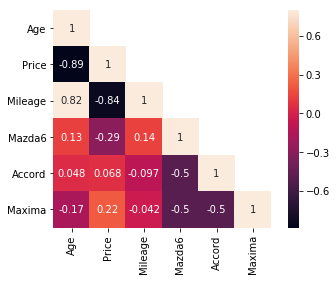

In [146]:
#Correlation matrix and heat map. 
#It looks like data is pretty well but Mileage and Age of the car is highly dependent on each other. 

corrMatt=data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig.ax=plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask, vmax=0.8, square=True, annot=True)

In [147]:
#Changing the order of the attributes

data = data[['CarType', 'Age', 'Mileage', 'Mazda6', 'Accord', 'Maxima', 'Price']]

In [148]:
data.head()

,CarType,Age,Mileage,Mazda6,Accord,Maxima,Price
0,Mazda6,3,17.8,1,0,0,15.9
1,Mazda6,2,19.0,1,0,0,16.4
2,Mazda6,1,20.9,1,0,0,18.9
3,Mazda6,2,24.0,1,0,0,16.9
4,Mazda6,2,24.0,1,0,0,20.5


Encoding Categorical Data and Replacing Categorical Values

In [149]:
print(data['CarType'].value_counts())

Maxima    30
Accord    30
Mazda6    30
Name: CarType, dtype: int64


In [150]:
#Mapping the categorical values of Cartype to integers.

replace_map = {'CarType': {'Maxima': 1, 'Accord': 2, 'Mazda6': 3}}

In [151]:
data.replace(replace_map, inplace=True)

In [152]:
data.head()

,CarType,Age,Mileage,Mazda6,Accord,Maxima,Price
0,3,3,17.8,1,0,0,15.9
1,3,2,19.0,1,0,0,16.4
2,3,1,20.9,1,0,0,18.9
3,3,2,24.0,1,0,0,16.9
4,3,2,24.0,1,0,0,20.5


In [153]:
#Splitting data into two groups where the first group is combination of the independent variables(X) and
# and another group (y) where it is my dependent value.

X=data.iloc[:, :-1]
y=data.iloc[:, -1]

In [154]:
#Adding extra column for to meet the criteria of Linear Regression for b0 in y= b0 +b1x1 +b2x2+...
X = np.append(arr=np.ones((X.shape[0], 1)), values=X, axis=1)

In [155]:
data.head()

,CarType,Age,Mileage,Mazda6,Accord,Maxima,Price
0,3,3,17.8,1,0,0,15.9
1,3,2,19.0,1,0,0,16.4
2,3,1,20.9,1,0,0,18.9
3,3,2,24.0,1,0,0,16.9
4,3,2,24.0,1,0,0,20.5


In [156]:
# !pip install tabulate

In [157]:
# from tabulate import tabulate

In [158]:
# table = tabulate(X)
# table

In [159]:
X

array([[  1. ,   3. ,   3. ,  17.8,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   2. ,  19. ,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   1. ,  20.9,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   2. ,  24. ,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   2. ,  24. ,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   1. ,  24.2,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   2. ,  30.1,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   3. ,  32. ,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   3. ,  34.8,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   4. ,  35.7,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   4. ,  49.5,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   3. ,  50.9,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   3. ,  51.1,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   3. ,  51.7,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   3. ,  53.6,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   1. ,  55.5,   1. ,   0. ,   0. ],
       [  1. ,   3. ,   7. ,  66.2,   1. ,   0. ,   0. ],
       [  1. ,

In [160]:
y

0     15.9
1     16.4
2     18.9
3     16.9
4     20.5
5     19.0
6     17.5
7     18.0
8     13.6
9     12.0
10    10.0
11    17.9
12    17.8
13    16.0
14    14.6
15    14.0
16     8.0
17     8.5
18     9.0
19     7.8
20     6.8
21     5.0
22     4.5
23     5.6
24     2.0
25     5.8
26     5.2
27     3.0
28     9.9
29     5.0
      ... 
60    27.0
61    16.5
62    15.3
63    15.7
64    19.9
65    15.5
66    21.0
67    21.0
68    19.9
69    20.0
70    20.0
71    15.0
72    17.3
73    17.0
74    17.5
75    12.5
76    15.2
77    13.8
78    16.9
79    18.0
80    13.0
81    13.8
82    12.5
83    13.0
84    11.5
85     9.5
86    13.0
87    11.8
88     6.0
89     4.8
Name: Price, Length: 90, dtype: float64

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [162]:
#Getting ready for Linear regression model. splitting the data into train and test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state=0)

In [163]:
X_train.size

504

In [164]:
X_test.size

126

In [165]:
#Since the data wasnt scaled here is how we scale it. Lets scale the data

scaler = StandardScaler()

In [166]:
#Fitting train and test data to be scaled.

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
X_train

array([[ 0.        , -1.16316   , -0.15310299, -0.091936  , -0.68511879,
        -0.68511879,  1.33012434],
       [ 0.        ,  0.05057217,  0.09742918,  0.06414229, -0.68511879,
         1.4596009 , -0.75180941],
       [ 0.        ,  1.26430434,  2.10168656,  1.22636813,  1.4596009 ,
        -0.68511879, -0.75180941],
       [ 0.        ,  1.26430434, -0.90469951, -0.88347589,  1.4596009 ,
        -0.68511879, -0.75180941],
       [ 0.        , -1.16316   , -0.65416734, -1.05070263, -0.68511879,
        -0.68511879,  1.33012434],
       [ 0.        ,  0.05057217,  0.8490257 ,  0.07529074, -0.68511879,
         1.4596009 , -0.75180941],
       [ 0.        , -1.16316   , -0.15310299, -0.01947108, -0.68511879,
        -0.68511879,  1.33012434],
       [ 0.        ,  0.05057217, -0.40363517, -1.20399381, -0.68511879,
         1.4596009 , -0.75180941],
       [ 0.        , -1.16316   ,  0.34796135, -0.47098327, -0.68511879,
        -0.68511879,  1.33012434],
       [ 0.        , -1.1631

In [168]:
#X_test

In [169]:
#Applying Multiple regression

regressor = LinearRegression()

In [170]:
#Training the algorithm and fitting the data into linear Regression Model.

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [171]:
print(regressor.intercept_)

13.629166666666666


In [172]:
print(regressor.coef_)

[ 0.         -0.34303197 -3.23373008 -1.84944845 -0.43998034  0.27380766
  0.16130803]


In [173]:
#Predicting the 'Price' atribute.

predictions = regressor.predict(X_test)
predictions

array([18.08828616, 14.88035618, 18.77602685, 20.14803392, 16.9452516 ,
       12.39109463, 19.25628456, 19.0646856 , 16.5956154 ,  7.65135739,
       15.89581643,  2.82007337, 13.66944052, 17.07411711, 15.75148706,
       10.89232251,  3.82006976, 17.5079902 ])

In [174]:
#The real Price values.

y_test

2     18.9
13    16.0
53    21.0
41    19.5
66    21.0
30    12.0
45    17.5
43    17.4
78    16.9
89     4.8
7     18.0
26     5.2
33    12.5
63    15.7
8     13.6
16     8.0
24     2.0
56    16.0
Name: Price, dtype: float64

In [175]:
from sklearn.metrics import r2_score

In [176]:
#Here is a nice format to see what is the real data and what is the predicted value looks like

df = pd.DataFrame({'Actual': y_test , 'Predicted': predictions})
df

,Actual,Predicted
2,18.9,18.088286
13,16.0,14.880356
53,21.0,18.776027
41,19.5,20.148034
66,21.0,16.945252
30,12.0,12.391095
45,17.5,19.256285
43,17.4,19.064686
78,16.9,16.595615
89,4.8,7.651357


In [177]:
#r2 score to see how well our predcition model did. I am successfull %87 here with this model.

r2_score(y_test, predictions)

0.8749853622053401

In [178]:
#r2_score()

In [179]:
import statsmodels.formula.api as sm

In [180]:
#Statistics result through 'Ordinary Least Squares'. As it is shown below p-values are stabil and looks good so there is not much to do 
#with this model to be applied.

X_opt = X[:, [0,1,2,3,4,5,6]]

In [181]:
regressor_OLS=sm.OLS(endog =y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     122.0
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.22e-34
Time:                        01:35:03   Log-Likelihood:                -195.56
No. Observations:                  90   AIC:                             401.1
Df Residuals:                      85   BIC:                             413.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5297      0.210     40.624      0.000       8.112       8.947
x1             4.9812      0.154     32.363      0.000       4.675       5.287
x2            -0.8172      0.108     -7.567      0.000      -1.032      -0.602
x3            -0.0520      0.012     -4.490      0.000      -0.075      -0.029
x4            -3.4399      0.219    -15.708      0.000      -3.875      -3.005
x5             3.3314      0.339      9.840      0.000       2.658       4.004
x6             8.6382      0.335     25.796      0.000       7.972       9.304
==============================================================================
Omnibus:                        6.631   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.011
Skew:                           0.591   Prob(JB):                       0.0495
Kurtosis:                       3.451   Cond. No.                     1.63e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Observation: 

### -Data is explored and problem is defined.

#### -Multiple Linear Regression model is selected to create a prediction model to predict Price of a car based on independent variables.

#### -Solution is implemented.

#### -Result for this model is analysed and As a result; prediction model is successful for about %87.


#### -There can be other models to be used such as 
#### -Lasso and other regression models and we might get a better result as a matter of fact.